In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

# Load the dataset
file_path = 'Employee.csv'  
df = pd.read_csv(file_path)

In [3]:
# 1. Data Exploration 

print("First 5 rows:\n", df.head())
print("\nShape of data:", df.shape)


First 5 rows:
    Company   Age  Salary     Place Country  Gender
0      TCS  20.0     NaN   Chennai   India       0
1  Infosys  30.0     NaN    Mumbai   India       0
2      TCS  35.0  2300.0  Calcutta   India       0
3  Infosys  40.0  3000.0     Delhi   India       0
4      TCS  23.0  4000.0    Mumbai   India       0

Shape of data: (148, 6)


In [5]:
for col in df.columns:
    print(f"\nUnique values in '{col}':\n", df[col].unique())
    print(f"Number of unique values in '{col}': {len(df[col].unique())}")


Unique values in 'Company':
 ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Number of unique values in 'Company': 7

Unique values in 'Age':
 [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Number of unique values in 'Age': 30

Unique values in 'Salary':
 [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Number of unique values in 'Salary': 41

Unique values in 'Place':
 ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Number of unique values in 'Place': 12

Unique values in 'Country':
 ['India']
Number of unique values in 'Country': 1

Unique values in 'Gender':
 [0 1]
Number of unique values in 'Gender': 2


In [7]:
print("\nStatistical summary:\n", df.describe())



Statistical summary:
               Age       Salary      Gender
count  130.000000   124.000000  148.000000
mean    30.484615  5312.467742    0.222973
std     11.096640  2573.764683    0.417654
min      0.000000  1089.000000    0.000000
25%     22.000000  3030.000000    0.000000
50%     32.500000  5000.000000    0.000000
75%     37.750000  8000.000000    0.000000
max     54.000000  9876.000000    1.000000


In [9]:
# Renaming Columns
df.rename(columns=lambda x: x.strip().lower().replace(' ', '_'), inplace=True)
print("\nRenamed columns:\n", df.columns)


Renamed columns:
 Index(['company', 'age', 'salary', 'place', 'country', 'gender'], dtype='object')


In [11]:
# 2. Data Cleaning

# Find missing values
print("\nMissing values before cleaning:\n", df.isnull().sum())

# Replace '0' in 'age' column with NaN
df['age'] = df['age'].replace(0, np.nan)




Missing values before cleaning:
 company     8
age        18
salary     24
place      14
country     0
gender      0
dtype: int64


In [13]:
print("\nMissing values after replacing 0 age with NaN:\n", df.isnull().sum())




Missing values after replacing 0 age with NaN:
 company     8
age        24
salary     24
place      14
country     0
gender      0
dtype: int64


In [15]:
# Remove duplicate rows
df = df.drop_duplicates()
print("\nShape after removing duplicates:", df.shape)



Shape after removing duplicates: (144, 6)


In [19]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['int64', 'float64']:
            df[col] = df[col].fillna(df[col].median())
        else:
            df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing values after treating nulls:\n", df.isnull().sum())


Missing values after treating nulls:
 company    0
age        0
salary     0
place      0
country    0
gender     0
dtype: int64


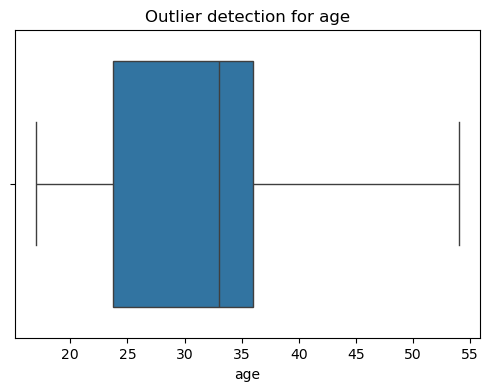

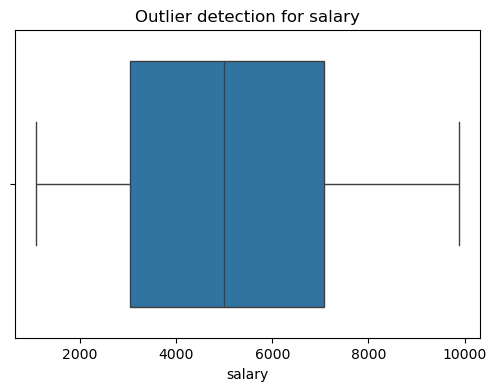

In [21]:
# Outlier detection using boxplots
for col in ['age', 'salary']: 
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Outlier detection for {col}')
    plt.show()



Filtered data:
      company   age  salary      place country  gender
21   Infosys  50.0  3184.0      Delhi   India       0
32   Infosys  45.0  4034.0   Calcutta   India       0
39   Infosys  41.0  3000.0     Mumbai   India       0
50   Infosys  41.0  3000.0    Chennai   India       0
57   Infosys  51.0  3184.0  Hyderabad   India       0
68   Infosys  43.0  4034.0     Mumbai   India       0
75   Infosys  44.0  3000.0     Cochin   India       0
86   Infosys  41.0  3000.0      Delhi   India       0
93   Infosys  54.0  3184.0     Mumbai   India       0
104  Infosys  44.0  4034.0      Delhi   India       0
122  Infosys  44.0  3234.0     Mumbai   India       0
129  Infosys  50.0  3184.0   Calcutta   India       0
138      CTS  44.0  3033.0     Cochin   India       0
140  Infosys  44.0  4034.0  Hyderabad   India       0
145  Infosys  44.0  4034.0      Delhi   India       1


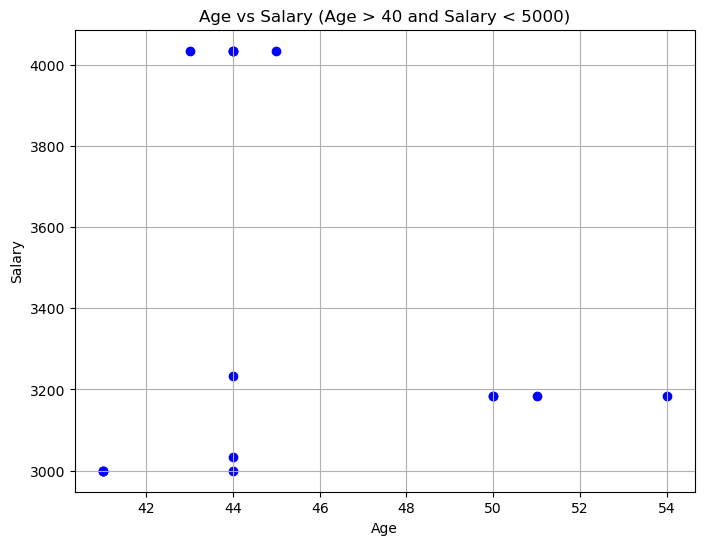

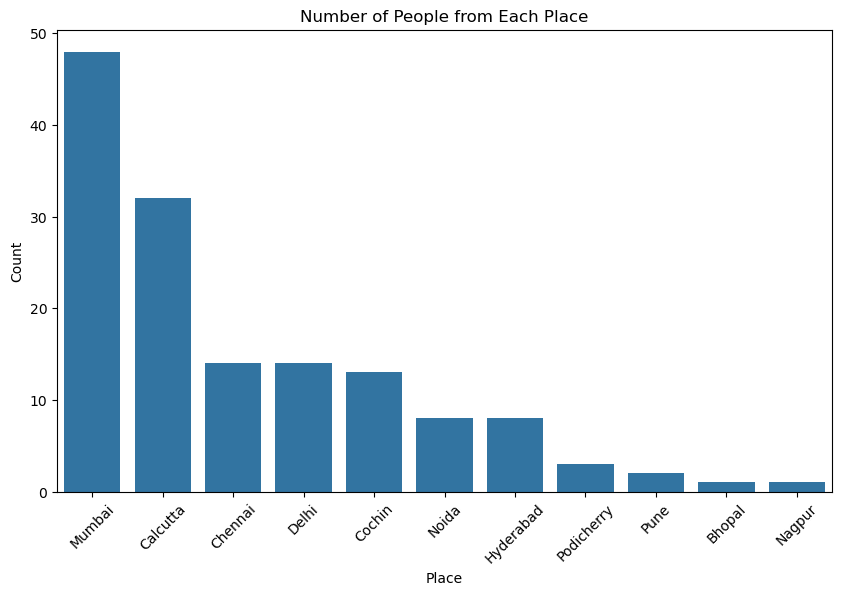


Categorical Columns:
 Index(['company', 'place', 'country'], dtype='object')

Data after Label Encoding:
    company   age  salary  place  country  gender
0        4  20.0  5000.0      2        0       0
1        2  30.0  5000.0      6        0       0
2        4  35.0  2300.0      1        0       0
3        2  40.0  3000.0      4        0       0
4        4  23.0  4000.0      6        0       0

Standard Scaled data sample:
 [[ 0.99148921 -1.48467637 -0.10082748 -0.89325451  0.         -0.53452248]
 [-0.23932498 -0.26717411 -0.10082748  0.7505621   0.         -0.53452248]
 [ 0.99148921  0.34157702 -1.2437349  -1.30420866  0.         -0.53452248]
 [-0.23932498  0.95032816 -0.94742557 -0.07134621  0.         -0.53452248]
 [ 0.99148921 -1.11942569 -0.52412653  0.7505621   0.         -0.53452248]]

Min-Max Scaled data sample:
 [[0.8        0.08108108 0.44508934 0.2        0.         0.        ]
 [0.4        0.35135135 0.44508934 0.6        0.         0.        ]
 [0.8        0.48648649 

In [23]:
# 3. Data Analysis 


# Filter data: age > 40 and salary < 5000
filtered_data = df[(df['age'] > 40) & (df['salary'] < 5000)]
print("\nFiltered data:\n", filtered_data)

# Plot Age vs Salary
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data['age'], filtered_data['salary'], color='blue')
plt.title('Age vs Salary (Age > 40 and Salary < 5000)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

# Count number of people from each place 
if 'place' in df.columns:
    place_counts = df['place'].value_counts()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=place_counts.index, y=place_counts.values)
    plt.xticks(rotation=45)
    plt.title('Number of People from Each Place')
    plt.xlabel('Place')
    plt.ylabel('Count')
    plt.show()
else:
    print("No 'place' column found!")

# 4. Data Encoding 

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:\n", categorical_cols)

# Apply Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("\nData after Label Encoding:\n", df.head())

# 5. Feature Scaling 

# Scaling features using StandardScaler
scaler_standard = StandardScaler()
df_standard_scaled = scaler_standard.fit_transform(df)

print("\nStandard Scaled data sample:\n", df_standard_scaled[:5])

# Scaling features using MinMaxScaler
scaler_minmax = MinMaxScaler()
df_minmax_scaled = scaler_minmax.fit_transform(df)

print("\nMin-Max Scaled data sample:\n", df_minmax_scaled[:5])